In [62]:
import time
import math
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers import Input
from keras.layers.recurrent import LSTM
import numpy as np
import pandas as pd
import sklearn.preprocessing as pre
import matplotlib.pyplot as plt2


In [4]:
df = pd.read_csv('data/proce.csv')


In [20]:
def stand_scale(data):#features with mean 0 and standard deviation 1
    size,x,y=data.shape
    data=data.reshape(size,x*y)
    data=pre.scale(data)
    data=data.reshape(size,x,y)
    return data

In [56]:
def preprocess_data(stock, seq_len):# dividing test AND train set
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() 
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index : index + sequence_length])  
    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[: int(row), :]
    train, result = stand_scale(train), stand_scale(result)
    X_train = train[:, : -1]
    y_train = train[:, -1][: ,-1]
    X_test = result[int(row) :, : -1]
    y_test = result[int(row) :, -1][ : ,-1]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))  
    return [X_train, y_train, X_test, y_test]
    

In [57]:
def build_model(layers):
    model = Sequential()
    # By setting return_sequences to True we are able to stack another LSTM layer
    model.add(LSTM(input_dim=layers[0],output_dim=layers[1],return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(layers[2],return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(output_dim=layers[3]))
    model.add(Activation("linear"))
    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop", metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model
    

In [58]:
window = 20
X_train, y_train, X_test, y_test = preprocess_data(df[:: -1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1090, 20, 6)
y_train (1090,)
X_test (121, 20, 6)
y_test (121,)


In [59]:
model = build_model([X_train.shape[2], window, 100, 1])

c:\users\shantanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  after removing the cwd from sys.path.
c:\users\shantanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 6), units=20)`
  after removing the cwd from sys.path.


Compilation Time :  0.02697134017944336


c:\users\shantanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


In [60]:
model.fit(X_train,y_train,batch_size=768,nb_epoch=30,validation_split=0.1,verbose=0)

c:\users\shantanu\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


In [61]:
train_score = model.evaluate(X_train, y_train, verbose=1)
test_score = model.evaluate(X_test, y_test, verbose=1)
print("train",trainScore[0], math.sqrt(trainScore[0]))
print("test",testScore[0], math.sqrt(testScore[0]))

121/121 [==============================] - 0s 281us/step
train 1.0530355670015286e-09 3.24505095029574e-05
test 1.4992360933985812e-09 3.871997021432973e-05


In [64]:
pred = model.predict(X_test)

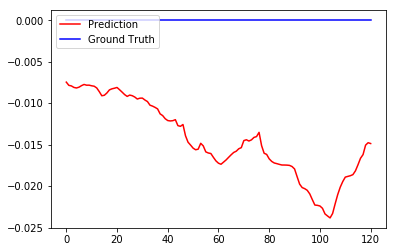

In [65]:
plt2.plot(pred, color='red', label='Prediction')
plt2.plot(y_test, color='blue', label='Ground T')
plt2.legend(loc='upper left')
plt2.show()